In [1]:
import os
import json
import pandas as pd

In [2]:
root_folder = "tunings"


# get all paths
all_paths = []
for dataset_folder in os.listdir(root_folder):
    if not os.path.isdir(os.path.join(root_folder, dataset_folder)):
        continue
    for tune_folder in os.listdir(os.path.join(root_folder, dataset_folder)):
        tune_path = os.path.join(root_folder, dataset_folder, tune_folder)
        all_paths.append(tune_path)
# get all configs, and best params
all_cfgs = []
all_best_params = []
for tune_path in all_paths:
    try:
        # load cfg and best params
        with open(os.path.join(tune_path, "cfg.json"), "r") as f:
            cfg = json.load(f)
        best_params = pd.read_csv(os.path.join(tune_path, "best_params.csv"), index_col=0)

        for param in best_params:
            if param in cfg:
                cfg[param] = best_params[param].values[0]
        # store
        all_cfgs.append(cfg)
        all_best_params.append(best_params)
    except FileNotFoundError:
        print(f"No cfg.json found in {tune_path}")




No cfg.json found in tunings/MIMIC_60/xgb_200_2022-04-18_05-03-30
No cfg.json found in tunings/UKE_60/rnn_2022-03-11_15-00-13
No cfg.json found in tunings/UKE_60/rnn_2022-03-11_16-00-58
No cfg.json found in tunings/UKE_60/gpt_2022-03-23_22-12-02
No cfg.json found in tunings/UKE_60/xgb_2022-03-23_23-36-03
No cfg.json found in tunings/UKE_60/rnn_2022-03-19_23-09-26
No cfg.json found in tunings/UKE_60/gpt_2022-03-04_23-11-56
No cfg.json found in tunings/UKE_60/xgb_2022-03-23_23-39-33
No cfg.json found in tunings/UKE_60/gpt_2022-03-23_20-59-52
No cfg.json found in tunings/UKE_60/gpt_2022-03-22_20-26-34
No cfg.json found in tunings/UKE_60/xgb_2022-03-23_23-26-34
No cfg.json found in tunings/UKE_60/rnn_2022-03-23_23-31-22
No cfg.json found in tunings/UKE_60/rnn_2022-03-22_19-49-09
No cfg.json found in tunings/UKE_60/gpt_2022-03-19_21-05-46
No cfg.json found in tunings/UKE_60/gpt_2022-03-04_22-40-33
No cfg.json found in tunings/UKE_60/xgb_200_2022-04-15_09-08-11


In [3]:
# merge best param list of dfs in one big df
all_best_params_df = pd.concat(all_best_params).drop(columns=["fill_type"])
# merge cfg list to it
all_cfgs_df = pd.DataFrame(all_cfgs)
# merge cfg and best params df, avoiding reindexing error
all_df = pd.concat([all_cfgs_df.reset_index(drop=True), all_best_params_df.reset_index(drop=True)], axis=1)
# drop all coumns that contain only one unique value
all_df.drop(columns=all_df.nunique()[all_df.nunique()<=1].index, inplace=True)

In [4]:
all_df

,model_type,db_name,fill_type,block_size,bs,max_len,max_epochs,lr,weight_decay,grad_clip_val,...,n_estimators,max_depth,subsample,colsample_bytree,gamma,min_child_weight,flat_block_size,C,max_iter,l1_ratio
0,gpt,MIMIC,none,0,6,128,30,0.001273,3.5,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,xgb,MIMIC,median,0,8,128,30,0.015175,0.2,1.0,...,120.0,3.0,0.80,1.0,2.3,2.2,5.0,NaN,NaN,NaN
2,xgb,MIMIC,median,128,8,512,30,0.021994,0.2,1.0,...,40.0,4.0,0.95,0.5,2.7,2.9,12.0,NaN,NaN,NaN
3,linear,MIMIC,median,0,8,128,30,0.000100,0.2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,32.0,0.000057,164.0,0.0
4,rnn,MIMIC,median,0,2,128,30,0.000058,0.2,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,rnn,UKE,none,0,4,128,20,0.013850,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,rnn,UKE,none,0,4,128,30,0.004608,2.3,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,linear,UKE,median,0,8,128,30,0.000100,0.2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,96.0,2.991650,444.0,0.1
77,rnn,UKE,none,0,4,128,20,0.022186,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
mlps = all_df[all_df["model_type"]=="mlp"].sort_values("val_score_mean", ascending=False)
mlps[["db_name", "fill_type", "nan_embed_size",
                     "norm_nan_embed", "freeze_nan_embed", "val_score_mean"]]

,db_name,fill_type,nan_embed_size,norm_nan_embed,freeze_nan_embed,val_score_mean
54,UKE,none,512.0,1,0.0,0.532452
56,UKE,median,512.0,0,0.0,0.511145
55,UKE,median,512.0,1,0.0,0.505598
58,UKE,none,512.0,0,0.0,0.418124
53,UKE,none,128.0,1,0.0,0.415277
73,UKE,none,32.0,1,0.0,0.399797
71,UKE,none,8.0,1,0.0,0.391928
72,UKE,none,4.0,1,0.0,0.368658
12,MIMIC,median,512.0,1,0.0,0.240922
26,MIMIC,median,512.0,0,0.0,0.240008


In [6]:
nan_embeds = all_df.dropna(subset=["nan_embed_size"])
nan_embeds = nan_embeds[nan_embeds["model_type"] =="mlp"]
nan_embeds = nan_embeds[nan_embeds["fill_type"] == "none"]
nan_embeds = nan_embeds[nan_embeds["norm_nan_embed"] == 1]

reduced = nan_embeds[["db_name", "fill_type", "nan_embed_size",
                     "norm_nan_embed", "freeze_nan_embed", "val_score_mean"]]
reduced.sort_values(by=["val_score_mean"], ascending=False, inplace=False)

,db_name,fill_type,nan_embed_size,norm_nan_embed,freeze_nan_embed,val_score_mean
54,UKE,none,512.0,1,0.0,0.532452
53,UKE,none,128.0,1,0.0,0.415277
73,UKE,none,32.0,1,0.0,0.399797
71,UKE,none,8.0,1,0.0,0.391928
72,UKE,none,4.0,1,0.0,0.368658
33,MIMIC,none,128.0,1,0.0,0.239140
9,MIMIC,none,512.0,1,0.0,0.238967
31,MIMIC,none,32.0,1,0.0,0.227492
32,MIMIC,none,8.0,1,0.0,0.221210
21,MIMIC,none,4.0,1,0.0,0.211952


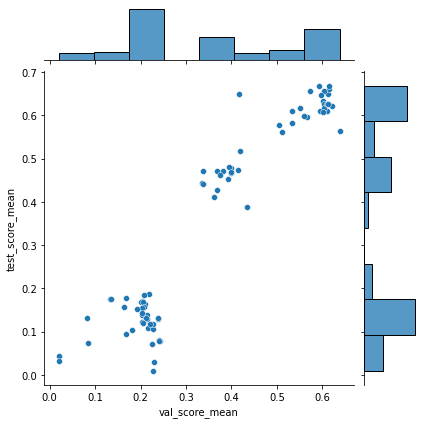

In [7]:
x = "val_score_mean"
y = "test_score_mean"

import seaborn as sns
#p = sns.regplot(x=x, y=y, data=all_df)

sns.jointplot(x=x, y=y, data=all_df)


In [8]:
all_df = all_df.drop(columns=["tree_method", "gpu"])
all_df = all_df[all_df["freeze_nan_embed"] != 1].drop(columns=["freeze_nan_embed"])

In [9]:
final_df = all_df[all_df["max_epochs"] == 30]
final_df = final_df[final_df["opt_steps"] == 200]

In [10]:
final_df.to_csv("tunings/final_df.csv")

In [11]:
final_df.columns

Index(['model_type', 'db_name', 'fill_type', 'block_size', 'bs', 'max_len',
       'max_epochs', 'lr', 'weight_decay', 'grad_clip_val', 'hidden_size',
       'mode', 'pretrained', 'flat_block_size', 'l1_ratio', 'n_estimators',
       'max_depth', 'min_child_weight', 'gamma', 'subsample',
       'colsample_bytree', 'opt_steps', 'norm_nan_embed', 'nan_embed_size',
       'flat_block_size_range', 'lr', 'weight_decay', 'grad_clip_val', 'bs',
       'val_score_mean', 'val_score_std', 'test_score_mean', 'test_score_std',
       'n_estimators', 'max_depth', 'subsample', 'colsample_bytree', 'gamma',
       'min_child_weight', 'flat_block_size', 'C', 'max_iter', 'l1_ratio'],
      dtype='object')

In [32]:
score_comp = final_df[["model_type", "db_name", "val_score_mean", "test_score_mean", "norm_nan_embed",
                       "nan_embed_size",
                      "pretrained", "hidden_size", "fill_type", "flat_block_size", "val_score_std", 
                      "test_score_std"]]

In [33]:
all_cfgs[0].keys()

dict_keys(['model_type', 'target_name', 'db_name', 'minutes', 'seed', 'features', 'fill_type', 'target_nan_quantile', 'block_size', 'random_starts', 'train_noise_std', 'bs', 'min_len', 'max_len', 'max_epochs', 'lr', 'use_nan_embed', 'weight_decay', 'grad_clip_val', 'val_check_interval', 'max_steps', 'use_macro_loss', 'use_pos_weight', 'use_huber', 'dropout', 'hidden_size', 'use_static', 'rnn_layers', 'rnn_type', 'mode', 'clip_name', 'gpt_name', 'pretrained', 'flat_block_size', 'alpha', 'l1_ratio', 'n_estimators', 'max_depth', 'min_child_weight', 'gamma', 'subsample', 'colsample_bytree', 'tree_method', 'gpu', 'opt_steps', 'tune_hebo'])

In [34]:
final_df.columns

Index(['model_type', 'db_name', 'fill_type', 'block_size', 'bs', 'max_len',
       'max_epochs', 'lr', 'weight_decay', 'grad_clip_val', 'hidden_size',
       'mode', 'pretrained', 'flat_block_size', 'l1_ratio', 'n_estimators',
       'max_depth', 'min_child_weight', 'gamma', 'subsample',
       'colsample_bytree', 'opt_steps', 'norm_nan_embed', 'nan_embed_size',
       'flat_block_size_range', 'lr', 'weight_decay', 'grad_clip_val', 'bs',
       'val_score_mean', 'val_score_std', 'test_score_mean', 'test_score_std',
       'n_estimators', 'max_depth', 'subsample', 'colsample_bytree', 'gamma',
       'min_child_weight', 'flat_block_size', 'C', 'max_iter', 'l1_ratio'],
      dtype='object')

In [35]:
score_comp[score_comp["model_type"] == "mlp"]

,model_type,db_name,val_score_mean,test_score_mean,norm_nan_embed,nan_embed_size,pretrained,hidden_size,fill_type,flat_block_size,flat_block_size,val_score_std,test_score_std
7,mlp,MIMIC,0.216556,0.108383,0,512.0,1,2048,none,8.0,NaN,0.005798,0.004763
9,mlp,MIMIC,0.238967,0.128347,1,512.0,1,2048,none,8.0,NaN,0.003585,0.004285
12,mlp,MIMIC,0.240922,0.079849,1,512.0,1,2048,median,8.0,NaN,0.006787,0.008114
21,mlp,MIMIC,0.211952,0.130730,1,4.0,1,2048,none,8.0,NaN,0.008746,0.012670
26,mlp,MIMIC,0.240008,0.078218,0,512.0,1,2048,median,8.0,NaN,0.006915,0.004741
31,mlp,MIMIC,0.227492,0.116551,1,32.0,1,2048,none,8.0,NaN,0.003864,0.004808
32,mlp,MIMIC,0.221210,0.118193,1,8.0,1,2048,none,8.0,NaN,0.009572,0.010854
33,mlp,MIMIC,0.239140,0.131054,1,128.0,1,2048,none,8.0,NaN,0.004663,0.002521
53,mlp,UKE,0.415277,0.474050,1,128.0,1,2048,none,8.0,NaN,0.008119,0.006826
54,mlp,UKE,0.532452,0.581865,1,512.0,1,2048,none,8.0,NaN,0.005378,0.000747


,hidden_size,val_score_mean,val_score_std,test_score_mean,test_score_std
70,8,0.559810,0.027043,0.597520,0.015212
37,32,0.566826,0.077463,0.597159,0.025906
47,128,0.600520,0.049235,0.632875,0.033032
63,512,0.615332,0.021811,0.669147,0.011702
36,2048,0.615531,0.018903,0.660775,0.008855
67,4096,0.593258,0.037999,0.667211,0.011630


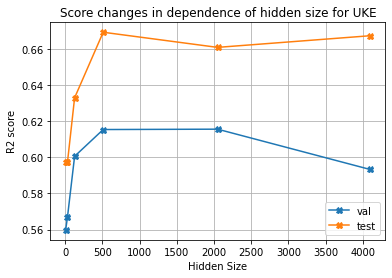

In [36]:
db = "UKE"
fill_type = "median"# "none", "median"

plot_df = score_comp[score_comp["db_name"] == db].sort_values("model_type").drop(columns=["db_name"])

first_models = plot_df[plot_df["fill_type"] == fill_type]

import matplotlib.pyplot as plt

# rnn best hidden size
rnn_df = first_models[first_models["model_type"] == "rnn"].sort_values("hidden_size").copy()
ax1 = rnn_df.plot(x="hidden_size", y="val_score_mean", kind="line", label="val", style="-X")
ax = rnn_df.plot(x="hidden_size", y="test_score_mean", kind="line", ax=ax1, label="test", style="-X")
plt.grid(True)
plt.ylabel("R2 score")
plt.xlabel("Hidden Size")
plt.title(f"Score changes in dependence of hidden size for {db}")
# x-axis in log2 scale
#plt.xscale('log', base=2)

rnn_df[["hidden_size", "val_score_mean", "val_score_std", "test_score_mean", "test_score_std"]]


In [37]:
plot_df

,model_type,val_score_mean,test_score_mean,norm_nan_embed,nan_embed_size,pretrained,hidden_size,fill_type,flat_block_size,flat_block_size,val_score_std,test_score_std
78,gpt,0.601076,0.607094,NaN,NaN,1,2048,median,8.0,NaN,0.070674,1.971827e-02
39,gpt,0.637868,0.563642,1,512.0,1,2048,none,8.0,NaN,0.029661,3.385785e-02
41,gpt,0.609735,0.610409,NaN,NaN,0,2048,median,8.0,NaN,0.050700,1.615280e-02
66,gpt,0.610998,0.626319,NaN,NaN,0,2048,median,8.0,NaN,0.049107,1.309917e-02
59,gpt,0.572395,0.657517,NaN,NaN,1,2048,none,8.0,NaN,0.037922,1.324722e-02
44,linear,0.132717,0.174417,NaN,NaN,1,2048,median,32.0,32.0,0.000000,0.000000e+00
73,mlp,0.399797,0.468380,1,32.0,1,2048,none,8.0,NaN,0.010820,1.030082e-02
72,mlp,0.368658,0.427488,1,4.0,1,2048,none,8.0,NaN,0.011768,9.338538e-03
71,mlp,0.391928,0.451851,1,8.0,1,2048,none,8.0,NaN,0.007534,7.591759e-03
56,mlp,0.511145,0.561046,0,512.0,1,2048,median,8.0,NaN,0.004215,5.756196e-03


,model_type,val_score_mean,test_score_mean,hidden_size,flat_block_size,flat_block_size,val_score_std,test_score_std
4,RNN,0.615531,0.660775,2048.0,8.0,NaN,0.018903,8.855067e-03
0,GPT,0.607269,0.614607,2048.0,8.0,NaN,0.056827,1.632341e-02
2,MLP,0.508371,0.569676,2048.0,8.0,NaN,0.004405,4.838051e-03
5,XGB,0.376808,0.469025,2048.0,35.8,35.8,0.017802,1.134978e-02
3,RF,0.360712,0.411492,2048.0,31.0,31.0,0.000000,5.551115e-17
1,LINEAR,0.132717,0.174417,2048.0,32.0,32.0,0.000000,0.000000e+00


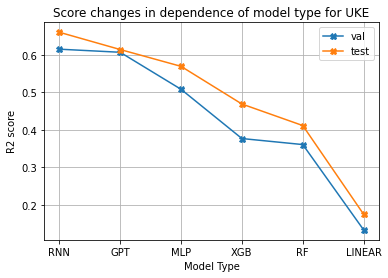

In [17]:
# plot for best model per model type
best_models = first_models[first_models["hidden_size"] == 2048].sort_values("model_type")
#best_models = best_models[(best_models["pretrained"] == 0) | (best_models["model_type"] != "gpt")]
best_models = best_models.groupby("model_type").mean().reset_index().sort_values("test_score_mean", ascending=False)
# capitalize model_type
best_models["model_type"] = best_models["model_type"].str.upper()
ax1 = best_models.plot(x="model_type", y="val_score_mean", kind="line", label="val", style="-X")
ax2 = best_models.plot(x="model_type", y="test_score_mean", kind="line", label="test", ax=ax1, style="-X")
plt.ylabel("R2 score")
plt.xlabel("Model Type")
plt.title(f"Score changes in dependence of model type for {db}")
# enabled grid
plt.grid(True)


#sns.barplot(x="model_type", y="val_score_mean", data=best_models)
# plot with std as error bar
#sns.barplot(x="model_type", y="val_score_mean", data=best_models, yerr="val_score_std")
best_models


In [18]:
fill_type_df = plot_df[plot_df["hidden_size"] == 2048].sort_values("model_type")

fill_type_df
#best_models = plot_df.groupby("model_type").mean().reset_index().sort_values("test_score_mean", ascending=False)



,model_type,val_score_mean,test_score_mean,norm_nan_embed,pretrained,hidden_size,fill_type,flat_block_size,flat_block_size,val_score_std,test_score_std
78,gpt,0.601076,0.607094,NaN,1,2048,median,8.0,NaN,0.070674,1.971827e-02
39,gpt,0.637868,0.563642,1,1,2048,none,8.0,NaN,0.029661,3.385785e-02
41,gpt,0.609735,0.610409,NaN,0,2048,median,8.0,NaN,0.050700,1.615280e-02
66,gpt,0.610998,0.626319,NaN,0,2048,median,8.0,NaN,0.049107,1.309917e-02
59,gpt,0.572395,0.657517,NaN,1,2048,none,8.0,NaN,0.037922,1.324722e-02
44,linear,0.132717,0.174417,NaN,1,2048,median,32.0,32.0,0.000000,0.000000e+00
53,mlp,0.415277,0.474050,1,1,2048,none,8.0,NaN,0.008119,6.826404e-03
54,mlp,0.532452,0.581865,1,1,2048,none,8.0,NaN,0.005378,7.473097e-04
55,mlp,0.505598,0.578306,1,1,2048,median,8.0,NaN,0.004595,3.919906e-03
58,mlp,0.418124,0.517412,0,1,2048,none,8.0,NaN,0.002047,7.259981e-03


In [22]:
rows = []
for model_type in fill_type_df["model_type"].unique():
    model_type_df = fill_type_df[fill_type_df["model_type"] == model_type]
    for fill_type in model_type_df["fill_type"].unique():
        sub_df = model_type_df[model_type_df["fill_type"] == fill_type]
        best = sub_df.nlargest(1, "val_score_mean")
        rows.append(best)

pd.concat(rows).sort_values("test_score_mean", ascending=False)
       
#fill_type_df.groupby("model_type").apply(lambda model_df: model_df.groupby("fill_type").apply(lambda x: x.nlargest(1, "val_score_mean")))

,model_type,val_score_mean,test_score_mean,norm_nan_embed,pretrained,hidden_size,fill_type,flat_block_size,flat_block_size,val_score_std,test_score_std
36,rnn,0.615531,0.660775,NaN,True,2048,median,8.0,NaN,0.018903,8.855067e-03
66,gpt,0.610998,0.626319,NaN,0,2048,median,8.0,NaN,0.049107,1.309917e-02
50,rnn,0.620786,0.620956,1,1,2048,none,8.0,NaN,0.025969,2.467148e-02
54,mlp,0.532452,0.581865,1,1,2048,none,8.0,NaN,0.005378,7.473097e-04
39,gpt,0.637868,0.563642,1,1,2048,none,8.0,NaN,0.029661,3.385785e-02
56,mlp,0.511145,0.561046,0,1,2048,median,8.0,NaN,0.004215,5.756196e-03
43,xgb,0.399677,0.477724,False,1,2048,median,63.0,63.0,0.008018,1.050492e-02
68,xgb,0.375124,0.462741,NaN,1,2048,none,32.0,32.0,0.020459,1.249036e-02
62,rf,0.360712,0.411492,NaN,1,2048,median,31.0,31.0,0.000000,5.551115e-17
44,linear,0.132717,0.174417,NaN,1,2048,median,32.0,32.0,0.000000,0.000000e+00


In [20]:
fill_type_df.groupby("model_type").mean().reset_index()

,model_type,val_score_mean,test_score_mean,hidden_size,flat_block_size,flat_block_size,val_score_std,test_score_std
0,gpt,0.606414,0.612996,2048.0,8.000000,NaN,0.047613,1.921506e-02
1,linear,0.132717,0.174417,2048.0,32.000000,32.000000,0.000000,0.000000e+00
2,mlp,0.442872,0.507550,2048.0,8.000000,NaN,0.006810,6.467614e-03
3,rf,0.360712,0.411492,2048.0,31.000000,31.000000,0.000000,5.551115e-17
4,rnn,0.612947,0.631232,2048.0,8.000000,NaN,0.023060,1.526591e-02
5,xgb,0.376527,0.467978,2048.0,35.166667,35.166667,0.018245,1.153988e-02
